<a href="https://colab.research.google.com/github/olaf-ys/Stock-Trading-with-Deep-Reinforcement-Learning/blob/main/Goldman_Sachs_Yuanshan_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=905b08e93ccc017e48750745a26006012f0c3b777c3bfaa870b251bd474ee4bb
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [ ]:
import yfinance as yf
import datetime

# Define the stock ticker symbol and the time period
## DO NOT CHANE THESE VALUES!
stock_symbol = 'GS'
start_date = '1999-05-04'
end_date = '2024-04-8'

# Fetch the historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

import plotly
import plotly.graph_objs as go

# Create a line plot of the stock's closing price
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Close Price')])

# Set the layout for the plot
fig.update_layout(title=f'Stock Price of {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')

# Display the plot
fig.show()

[*********************100%%**********************]  1 of 1 completed


# Technical Index

In [ ]:
import ta

# RSI
stock_data['RSI'] = ta.momentum.rsi(stock_data['Close'], window=14, fillna=True)

# SMA
stock_data['SMA'] = ta.trend.sma_indicator(stock_data['Close'], window=12, fillna=True)

# OBV
stock_data['OBV'] = ta.volume.on_balance_volume(stock_data['Close'], stock_data['Volume'], fillna=True)

# MACD related
# create an macd object
macd = ta.trend.MACD(stock_data['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=True)

# MACD line
stock_data['MACD'] = macd.macd()

# MACD signal line
stock_data['MACD_signal'] = macd.macd_signal()

# MACD histogram/diff
stock_data['MACD_diff'] = macd.macd_diff()

# Calculate daily price difference
stock_data['Price_diff'] = stock_data['Close'].diff().fillna(0)

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,OBV,MACD,MACD_signal,MACD_diff,Price_diff
Date,,,,,,,,,,,,,
1999-05-04,76.0000,77.250,70.0000,70.3750,50.535950,22320900,100.000000,70.375000,22320900,0.000000,0.000000,0.000000,0.0000
1999-05-05,69.8750,69.875,66.2500,69.1250,49.638340,7565700,0.000000,69.750000,14755200,-0.099715,-0.019943,-0.079772,-1.2500
1999-05-06,68.0000,69.375,67.0625,67.9375,48.785595,2905700,0.000000,69.145833,11849500,-0.271432,-0.070241,-0.201192,-1.1875
1999-05-07,67.9375,74.875,66.7500,74.1250,53.228794,4862300,73.942535,70.390625,16711800,0.090714,-0.038050,0.128764,6.1875
1999-05-10,73.3750,73.500,70.2500,70.6875,50.760342,2589400,51.263855,70.450000,14122400,0.099197,-0.010601,0.109797,-3.4375


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6272 entries, 1999-05-04 to 2024-04-05
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         6272 non-null   float64
 1   High         6272 non-null   float64
 2   Low          6272 non-null   float64
 3   Close        6272 non-null   float64
 4   Adj Close    6272 non-null   float64
 5   Volume       6272 non-null   int64  
 6   RSI          6272 non-null   float64
 7   SMA          6272 non-null   float64
 8   OBV          6272 non-null   int64  
 9   MACD         6272 non-null   float64
 10  MACD_signal  6272 non-null   float64
 11  MACD_diff    6272 non-null   float64
 12  Price_diff   6272 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 686.0 KB


6272 samples; 12 columns; no missing values

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(stock_data, test_size=0.3, shuffle=False)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1882 entries, 2016-10-12 to 2024-04-05
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1882 non-null   float64
 1   High         1882 non-null   float64
 2   Low          1882 non-null   float64
 3   Close        1882 non-null   float64
 4   Adj Close    1882 non-null   float64
 5   Volume       1882 non-null   int64  
 6   RSI          1882 non-null   float64
 7   SMA          1882 non-null   float64
 8   OBV          1882 non-null   int64  
 9   MACD         1882 non-null   float64
 10  MACD_signal  1882 non-null   float64
 11  MACD_diff    1882 non-null   float64
 12  Price_diff   1882 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 205.8 KB


The train data is from '1999-05-04' to '2019-04-10', and the test data is from '2019-04-11' to '2024-04-05'

Since we are going to use 1 year as the maximum episodes, the length of the sliding window should equal number of samples from '1999-05-04' to '2018-04-10'

In [ ]:
sequence_length = df_train['1999-05-04':'2018-04-11'].shape[0]
sequence_length

4390

In [ ]:
df_train.to_csv('GS_stock.csv', index=False)

# EDA

In [ ]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,OBV,MACD,MACD_signal,MACD_diff,Price_diff
count,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4.390000e+03,4390.000000,4390.000000,4.390000e+03,4390.000000,4390.000000,4390.000000,4390.000000
mean,132.442032,134.152559,130.727855,132.466220,103.660744,5.922401e+06,51.787832,132.345623,-9.658500e+07,0.151455,0.151520,-0.000065,0.022475
std,43.906449,44.152389,43.625897,43.880352,37.278978,6.779218e+06,11.820060,43.752305,2.041267e+08,3.045737,2.891628,0.855559,2.930067
min,54.000000,54.540001,47.410000,52.000000,40.078682,1.076000e+05,0.000000,60.218750,-5.165184e+08,-15.001013,-13.727321,-5.179980,-23.570007
25%,92.881250,94.115000,91.514999,93.000000,69.259302,2.676400e+06,43.130433,92.866875,-2.872329e+08,-1.520343,-1.398960,-0.472154,-1.380003
50%,131.375000,133.250000,129.614998,131.376251,102.647217,3.919050e+06,51.563040,131.011668,-2.885885e+07,0.440215,0.425371,0.006098,0.029999
75%,166.309998,167.857502,164.625004,166.197498,134.595066,6.393600e+06,60.543177,166.026457,7.923185e+07,2.000062,1.909850,0.473972,1.419998
max,243.550003,250.699997,240.000000,247.919998,190.180878,1.145907e+08,100.000000,231.754167,2.836555e+08,12.060865,10.735164,3.868444,24.569992


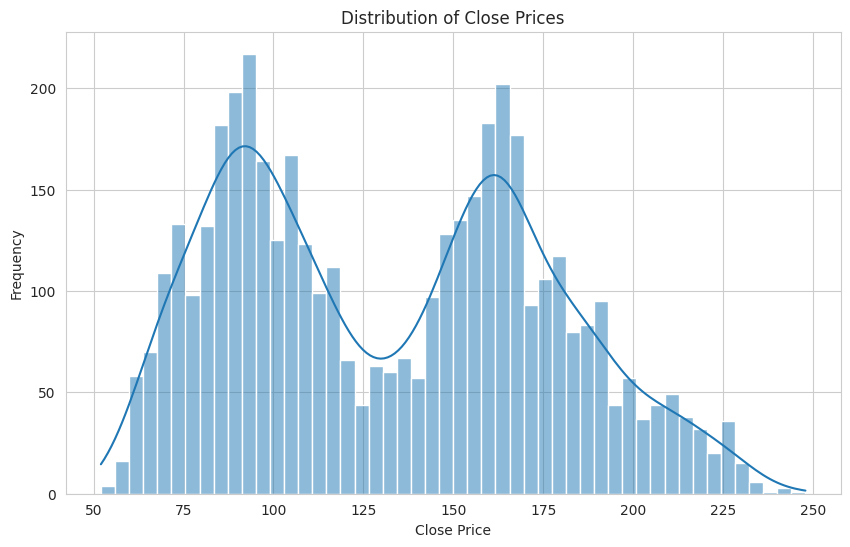

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Plot the distribution of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The price distribution is positively skewed

In [ ]:
# Calculate the median and variance of 'Close' prices
close_std = df_train['Close'].std()
close_std

43.880351616823404

## Correlation Analysis

In [ ]:
# import seaborn as sns

# # Pairplot
# sns.pairplot(df_train)
# plt.show()

Original features are positively skewed

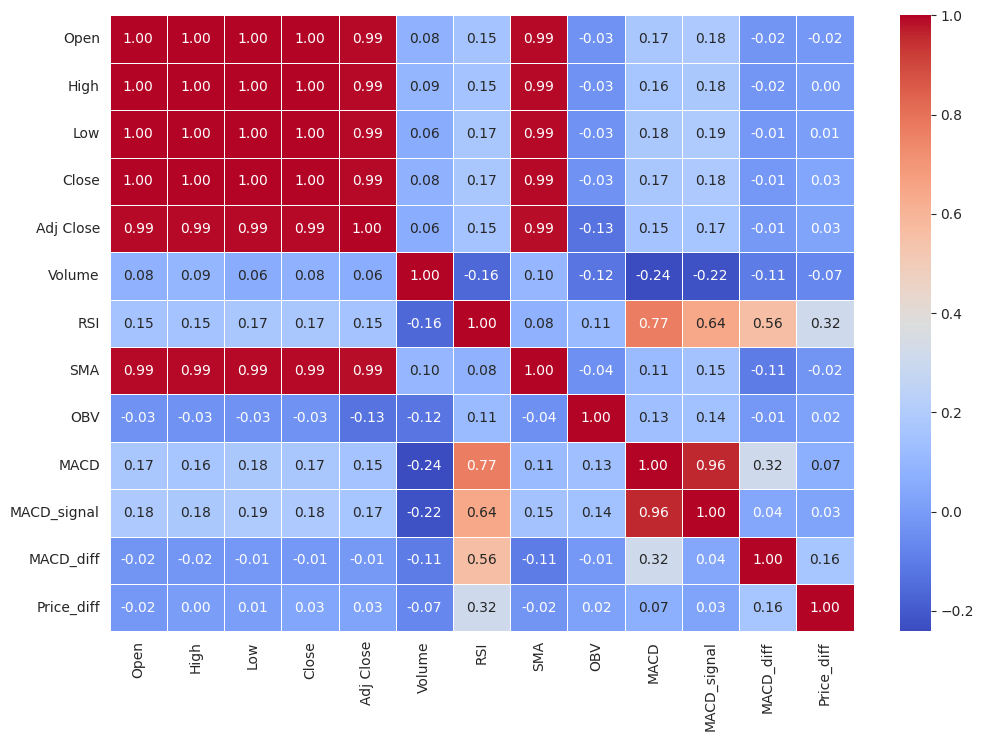

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = [col for col in df_train.columns if col not in ['Close']]
df_train_scaled = scaler.fit_transform(df_train[features_to_scale])
df_test_scaled = scaler.transform(df_test[features_to_scale])

In [ ]:
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,OBV,MACD,MACD_signal,MACD_diff,Price_diff
Date,,,,,,,,,,,,,
1999-05-04,76.0000,77.250,70.0000,70.3750,50.535950,22320900,100.000000,70.375000,22320900,0.000000,0.000000,0.000000,0.0000
1999-05-05,69.8750,69.875,66.2500,69.1250,49.638340,7565700,0.000000,69.750000,14755200,-0.099715,-0.019943,-0.079772,-1.2500
1999-05-06,68.0000,69.375,67.0625,67.9375,48.785595,2905700,0.000000,69.145833,11849500,-0.271432,-0.070241,-0.201192,-1.1875
1999-05-07,67.9375,74.875,66.7500,74.1250,53.228794,4862300,73.942535,70.390625,16711800,0.090714,-0.038050,0.128764,6.1875
1999-05-10,73.3750,73.500,70.2500,70.6875,50.760342,2589400,51.263855,70.450000,14122400,0.099197,-0.010601,0.109797,-3.4375


In [ ]:
import pandas as pd

df_train_scaled = pd.DataFrame(df_train_scaled, columns=features_to_scale, index=df_train.index)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=features_to_scale, index=df_test.index)

df_train_scaled['Close'] = df_train['Close']
df_test_scaled['Close'] = df_test['Close']

df_train_scaled.head()

,Open,High,Low,Adj Close,Volume,RSI,SMA,OBV,MACD,MACD_signal,MACD_diff,Price_diff,Close
Date,,,,,,,,,,,,,
1999-05-04,-1.285653,-1.288923,-1.392172,-1.425223,2.419212,4.079308,-1.416558,0.582577,-0.049732,-0.052405,0.000076,-0.007671,70.3750
1999-05-05,-1.425170,-1.455977,-1.478140,-1.449304,0.242430,-4.381850,-1.430845,0.545509,-0.082475,-0.059303,-0.093174,-0.434331,69.1250
1999-05-06,-1.467879,-1.467303,-1.459514,-1.472181,-0.445043,-4.381850,-1.444655,0.531272,-0.138861,-0.076699,-0.235109,-0.412998,67.9375
1999-05-07,-1.469303,-1.342720,-1.466678,-1.352980,-0.156393,1.874544,-1.416201,0.555095,-0.019945,-0.065566,0.150596,2.104296,74.1250
1999-05-10,-1.345446,-1.373866,-1.386441,-1.419203,-0.491706,-0.044335,-1.414844,0.542408,-0.017160,-0.056072,0.128425,-1.180986,70.6875


# Deep Reinforcement Leaning

Reinforcement learning is the state of the art and most current AI research is focused on RL. It also succeeded in many real-world applications such as auto-driving, the well-known Alpha Go, strategic gaming, as well as stock trading. It is substantially different from supervised and unsupervised learning and is regarded as the ‘third category of machine learning’ because, in reinforcement learning, the agent learns by interacting with the environment.

Deep reinforcement learning, on the other hand, combines reinforcement learning and deep neural networks.

## DQN (Deep Q Network)

DQN (Deep Q Network) is a combination of model-free reinforcement learning and deep neural networks. DQN is suitable for tasks with large or continuous state or action space or when environment dynamics are indeterministic (the reason for being a model-free algorithm). Therefore, using the action value function $Q(s,a)$ enables the algorithm to learn the best policy directly from the action without the necessity of the full knowledge of the environment dynamics.

DQN is, therefore, suitable in trading scenarios since the state space is large (the stock market is changing every second) and the full knowledge of the environment dynamics is impossible to gain (no one knows what tomorrow’ stock market will look like).



### Definitions

- Agent: the algorithm that can be trained to choose the optimal actions at each state to maximize the total rewards
- Environment: a stock trading simulation with which the agent can interact
- A (Action): hold, buy, and sell
- R (Reward): positive R when profit > 0, negative R when profit < 0
- S (State): stock info (given by a sliding window), balance, position, profits
- $Q(s,a)$: the expected return of taking action $a$ at state $s$
- Episode: $S_0, A_0, R_1, S_1, A_1, R_2, \ldots, S_t, A_t, R_{t+1}, \ldots, S_{T-1}, A_{T-1}, R_T, S_T$
- Transition Quintuple: 5 essential elements to calculate Q, expressed as $(s', a, r, s, done)$

### Environment

An environment is built using the OpenAI gym to simulate stock trading. The environment consists of 3 crucial methods: 1. reset() 2. get_observation() 3. step() 4. render()

- the reset method restores the environment to the initial state at the beginning of a new episode
- the get_observation method concatenates the state information
- the step method assigns rewards and returns 3 components of the transition quintuple: next_state, reward, and done (if an episode is done or not). The render method renders real-time information to the screen

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, initial_balance=50000, loss_limit=-4000, window=70):
        super().__init__()
        self.df = df
        self.initial_balance = initial_balance
        self.loss_limit = loss_limit
        self.window = window  # historical price window
        self.action_space = spaces.Discrete(3)  # 0: Hold, 1: Buy 1 stock, 2: Sell all

    # Reset the environment to the initial state
    def reset(self):
        self.current_step = self.window
        self.done = False
        self.total_profit = 0
        self.balance = self.initial_balance # available balance
        self.positions = []  # store positions
        self.history = self.df.iloc[self.current_step-self.window:self.current_step].values # initial history
        return self.get_observation()  # get_observation for the initial state

    def get_observation(self):
        stock_info = self.history
        extra_info = np.repeat([[self.total_profit, self.balance, sum(self.positions)]], self.window, axis=0)
        return np.concatenate([stock_info, extra_info], axis=1) # Concatenate along the features axis

    # Get quintuple components
    def step(self, action):

        self.current_price = self.df.iloc[self.current_step-1]['Close']
        reward = 0  # Initialize reward

        if action == 1:  # buy
            self.balance -= self.current_price # adjust balance
            self.positions.append(self.current_price) # buy one stock at current price

        elif action == 2:  # sell
            if self.positions:
                sold_amount = sum(self.positions)
                gains = self.current_price*len(self.positions) - sold_amount
                self.balance += self.current_price*len(self.positions) # adjust balance
                self.total_profit += gains
                reward = gains
                self.positions = [] # clear positions
            else:
                reward = -10  # negative reward for invalid sell with no stocks

        self.current_step += 1
        # Check if the episode is done
        if self.total_profit <= self.loss_limit or self.current_step >= self.df.shape[0]:
            self.done = True

        self.history = np.array(self.df.iloc[self.current_step-self.window:self.current_step]) # update history
        next_state = self.get_observation() # Get observation of the next step

        return next_state, reward, self.done, {'Trade price': self.current_price , 'Total profit': self.total_profit, 'Available balance': self.balance, 'Position value': sum(self.positions)}

    # Render the environment
    def render(self, mode='human', close=False):
        action = self.action_space.sample() # choose a random action
        next_state, reward, done, info = self.step(action)
        print(f'Step:{self.current_step}')
        print(f'Next State: {next_state}')
        print(f"Action:{action}, Reward:{reward}, Done:{done}, Info:{info}")

The functionality of the environment is tested using a subset of the data

In [ ]:
# keep only first 5 rows of df_train
data = df_train_scaled.iloc[:15][['Close', 'RSI', 'SMA', 'MACD']]
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Close,RSI,SMA,MACD
Date,,,,
1999-05-04,70.3750,4.079308,-1.416558,-0.049732
1999-05-05,69.1250,-4.381850,-1.430845,-0.082475
1999-05-06,67.9375,-4.381850,-1.444655,-0.138861
1999-05-07,74.1250,1.874544,-1.416201,-0.019945
1999-05-10,70.6875,-0.044335,-1.414844,-0.017160
1999-05-11,70.6250,-0.070228,-1.414177,-0.016986
1999-05-12,73.5000,0.876825,-1.404312,0.058086
1999-05-13,73.1875,0.739990,-1.397807,0.107489
1999-05-14,70.1875,-0.345776,-1.400367,0.065820


## Test the environment

The window size is set to be 3, so the initial state returns the price information of the first 3 days, total profit (0), available balance (50000), and position value (0):

In [ ]:
# Create the environment
env = StockTradingEnv(data, window=3)

# Check initial state
initial_state = env.reset()
initial_state

array([[ 7.03750000e+01,  4.07930768e+00, -1.41655812e+00,
        -4.97324031e-02,  0.00000000e+00,  5.00000000e+04,
         0.00000000e+00],
       [ 6.91250000e+01, -4.38185033e+00, -1.43084471e+00,
        -8.24753696e-02,  0.00000000e+00,  5.00000000e+04,
         0.00000000e+00],
       [ 6.79375000e+01, -4.38185033e+00, -1.44465508e+00,
        -1.38861370e-01,  0.00000000e+00,  5.00000000e+04,
         0.00000000e+00]])

The first step begins at step4, and the trade price at the current time step is the latest ‘Close’ in the current state (the current state of step4 is the initial state); The episode ends at step15 because the data has 15 samples

In [ ]:
# Test the environment
observation = env.reset()
for i in range(12):
    env.render()
    print()

# Close the environment
env.close()

Step:4
Next State: [[ 6.91250000e+01 -4.38185033e+00 -1.43084471e+00 -8.24753696e-02
   0.00000000e+00  5.00000000e+04  0.00000000e+00]
 [ 6.79375000e+01 -4.38185033e+00 -1.44465508e+00 -1.38861370e-01
   0.00000000e+00  5.00000000e+04  0.00000000e+00]
 [ 7.41250000e+01  1.87454438e+00 -1.41620096e+00 -1.99450368e-02
   0.00000000e+00  5.00000000e+04  0.00000000e+00]]
Action:2, Reward:-10, Done:False, Info:{'Trade price': 67.9375, 'Total profit': 0, 'Available balance': 50000, 'Position value': 0}

Step:5
Next State: [[ 6.79375000e+01 -4.38185033e+00 -1.44465508e+00 -1.38861370e-01
   0.00000000e+00  5.00000000e+04  0.00000000e+00]
 [ 7.41250000e+01  1.87454438e+00 -1.41620096e+00 -1.99450368e-02
   0.00000000e+00  5.00000000e+04  0.00000000e+00]
 [ 7.06875000e+01 -4.43345673e-02 -1.41484373e+00 -1.71595845e-02
   0.00000000e+00  5.00000000e+04  0.00000000e+00]]
Action:2, Reward:-10, Done:False, Info:{'Trade price': 74.125, 'Total profit': 0, 'Available balance': 50000, 'Position value

## Model

An LSTM (Long Short Term Memory) is used to estimate the Q function (expressed as Q_expected in the code) by using the current state as input. However, as mentioned above, since the environment dynamics are indeterministic, the ground truth of Q function (expressed as Q_target in the code) can only be approximated. In reinforcement learning, approximating the target is called ‘bootstrapping’. Q_target is bootstrapped using the same network but with the next state as input and less frequent network parameters updates.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define the DQN model with LSTM
class DQN_lstm(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(DQN_lstm, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)  # Final fully connected layer

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)  # Initial hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)  # Initial cell state
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_dim)
        out = out[:, -1, :]  # Get outputs for the last time step
        return self.fc(out)

## ReplayMemory

Since we are now approximating the Q with the LSTM, updating the weights for a state-action pair will affect the output of other states as well. When training NNs using stochastic gradient descent for a supervised task (for example, a classification task), we use multiple epochs to iterate through the training data multiple times until it converges. This is not feasible in Q-learning, since the episodes will change during the training, and as a result, some states that were visited in the early stages of training will become less likely to be visited later.

Furthermore, another problem is that when we train an NN, we assume that the training examples are IID (independently and identically distributed). However, the samples taken from an episode of the agent are not IID, as they obviously form a sequence of transitions.

To solve these issues, as the agent interacts with the environment and generates a transition quintuple, we store a large (but finite) number of such transitions in a memory buffer, often called replay memory. After each new interaction (that is, the agent selects an action and executes it in the environment), the resulting new transition quintuple is appended to the memory.

To keep the size of the memory bound, the oldest transition will be removed from the memory. Then, a mini-batch of examples is randomly selected from the memory buffer, which will be used for computing the loss and updating the network parameters.

In [ ]:
# Define the Replay Memory
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity # maximum
        self.memory = deque(maxlen=capacity) # replace the oldest transition, represented in the form of quintuple, with the latest transit when exceeds the maximum capacity

    def push(self, quintuple): # push a new transition to the memory
        self.memory.append(quintuple)

    def sample(self, batch_size): # random sample transitions of batch_size from the memory and use for training
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory) # return the current number of transitions in the memory

## Agent

The agent estimates the Q values for each action at each state using the trained LSTM model and chooses the action with the highest Q value. Moreover, to let the agent fully explore different strategies during the early stages of episodes in the training process, $\epsilon$-greedy policy is applied, giving non-optimal actions small chances to be chosen by the agent, and the chances decrease with time. However, the agent will only take deterministic actions (i.e. not using $\epsilon$-greedy policy) on the test data.

In [ ]:
# Define the Agent
class Agent:
    def __init__(self, state_size, action_size, dqn_model, epsilon_start=1.0, epsilon_end=0.01, epsilon_decay=200):
        self.state_size = state_size
        self.action_size = action_size
        self.epsilon = epsilon_start # epsilon greedy policy to ensure exploration other than only choosing the action that gives the highest Q value
        self.epsilon_min = epsilon_end # ensure explorations closing to the end of the training cycle
        self.epsilon_decay = epsilon_decay # control how fast epsilon decays to it minimum
        self.model = dqn_model

    def act(self, state, test=False):
        if not test and random.random() <= self.epsilon: # if the randomly generated number is smaller than epsilon
            return random.randrange(self.action_size) # choose a random action
        else:
            state = torch.FloatTensor(state).unsqueeze(0).to(device)
            with torch.no_grad():
                action_values = self.model(state) # calculate the action values at the current state
            return np.argmax(action_values.cpu().detach().numpy()) # return the action with the highest state value

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * (1 - 1/self.epsilon_decay))

## Trainer

First, the trainer estimates Q_expected and Q_target through the LSTM:
```python
Q_expected = self.agent.model(states).gather(1, actions).squeeze()
Q_next = self.agent.model(next_states).detach().max(1)[0]
Q_target = rewards + (self.gamma * Q_next * (1 - dones))
```
Then, it calculates loss, $L = \underset{traget} {\Big(\big(r+\gamma \max Q(s', a', w)\big)}  - \underset{output} {Q(s, a, w)\Big)^2}$, and updates gradients via backpropagation.

In [ ]:
class Trainer:
    def __init__(self, agent, memory, batch_size=128, gamma=0.99, lr=1e-3):
        self.agent = agent
        self.memory = memory
        self.batch_size = batch_size
        self.gamma = gamma # the discount factor
        self.optimizer = optim.Adam(agent.model.parameters(), lr=lr)

    def train_step(self):
        minibatch = self.memory.sample(self.batch_size)
        states, actions, rewards, next_states, dones = zip(*minibatch)

        states = torch.stack([torch.FloatTensor(s) for s in states]).to(device)
        next_states = torch.stack([torch.FloatTensor(s) for s in next_states]).to(device)
        actions = torch.LongTensor(np.array(actions)).view(-1, 1).to(device)
        rewards = torch.FloatTensor(np.array(rewards)).to(device)
        dones = torch.FloatTensor(np.array(dones)).to(device)

        Q_expected = self.agent.model(states).gather(1, actions).squeeze() # model(states) outputs the values estimated for each action, gather(1, actions) retrives the Q values for the action chosen by the agent
        Q_next = self.agent.model(next_states).detach().max(1)[0] # detach() prevents parameters being updated, max(1)[0] retrives the highest Q value
        Q_target = rewards + (self.gamma * Q_next * (1 - dones))

        loss = nn.MSELoss()(Q_expected, Q_target)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()

## LSTM

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
window_size = 100
state_size = df_train_scaled.shape[1]+3
action_size = env.action_space.n

# initialize environment
env = StockTradingEnv(df_train_scaled, window=window_size)

# initialize the model
lstm = DQN_lstm(input_dim=state_size, hidden_dim=64, output_dim=action_size).to(device)

# initialize agent
agent = Agent(state_size=state_size, action_size=action_size, dqn_model=lstm)

# initialize replay memory
memory = ReplayMemory(capacity=10000)

# initialize trainer
trainer = Trainer(agent, memory)

episode_reward = []
episode_loss = []
num_episodes = 100
initial_memory = 7000

# fill up the memory
while len(memory) < initial_memory:
    state = env.reset()
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        memory.push((state, action, reward, next_state, done))
        state = next_state

for episode in range(num_episodes):
    lstm.train()
    state = env.reset()
    total_reward = 0
    total_loss = []
    done =False

    while not done:
        action = agent.act(state)
        next_state, reward, done, info = env.step(action)
        memory.push((state, action, reward, next_state, done))
        loss = trainer.train_step()
        total_loss.append(loss)

        agent.update_epsilon()

        state = next_state
        total_reward += reward

    episode_reward.append(total_reward)
    episode_loss.append(np.mean(total_loss))
    print(f"Episode: {episode+1}, Memory: {len(memory)}, Train Loss: {np.mean(total_loss):.4f}, Train Reward: {total_reward:.4f},  Total Profit: {info['Total profit']}")

Episode: 1, Memory: 10000, Train Loss: 98182.1772, Train Reward: 44271.8809,  Total Profit: 44381.88090515137
Episode: 2, Memory: 10000, Train Loss: 178487.9191, Train Reward: -17332.7046,  Total Profit: 1797.2953987121582
Episode: 3, Memory: 10000, Train Loss: 161548.7702, Train Reward: -30813.8236,  Total Profit: -1263.8235626220703
Episode: 4, Memory: 10000, Train Loss: 4840.8616, Train Reward: -6074.3330,  Total Profit: -6074.3330154418945
Episode: 5, Memory: 10000, Train Loss: 13913.5789, Train Reward: 11158.2373,  Total Profit: 11158.237293243408
Episode: 6, Memory: 10000, Train Loss: 19171.9119, Train Reward: -12171.0598,  Total Profit: -12171.059787750244
Episode: 7, Memory: 10000, Train Loss: 45649.9203, Train Reward: 18264.0539,  Total Profit: 18264.053897857666
Episode: 8, Memory: 10000, Train Loss: 45908.4473, Train Reward: -17817.1496,  Total Profit: -17817.149600982666
Episode: 9, Memory: 10000, Train Loss: 95388.0376, Train Reward: -9423.4482,  Total Profit: -9423.448242

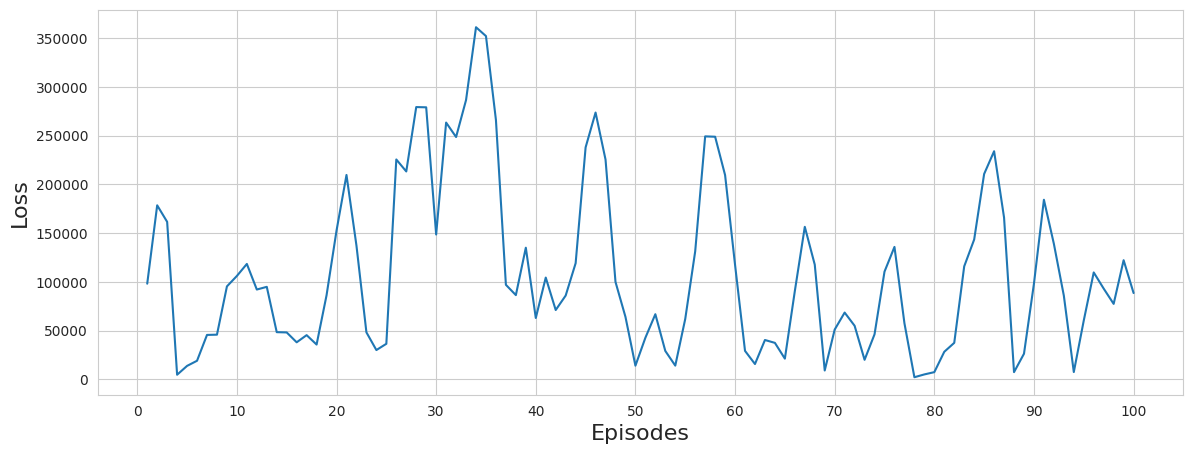

In [ ]:
episodes = list(range(1, num_episodes + 1))
plt.figure(figsize=(14, 5))
plt.plot(episodes, episode_loss, linestyle='-')
plt.xlabel('Episodes', size=16)
plt.ylabel('Loss', size = 16)
plt.grid(True)
plt.xticks(range(0, num_episodes + 1, 10))
plt.show()

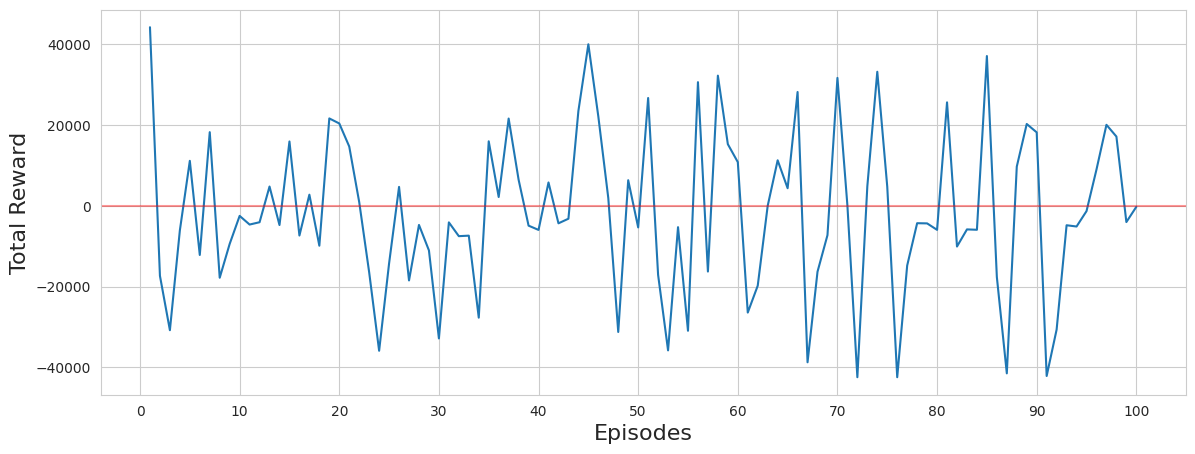

In [ ]:
episodes = list(range(1, num_episodes + 1))
plt.figure(figsize=(14, 5))
plt.plot(episodes, episode_reward, linestyle='-')
plt.xlabel('Episodes', size=16)
plt.ylabel('Total Reward', size = 16)
plt.grid(True)
plt.xticks(range(0, num_episodes + 1, 10))
plt.axhline(0, color='red', alpha=0.4)
plt.show()

We can observe that the loss and total reward barely converge after 100 episodes, which is quite reasonable since there are so many uncertainties in the stock market, and it usually requires thousands of episodes for the model to start showing signs of stability and convergence.

In [ ]:
# test
lstm.eval()
env_test = StockTradingEnv(df_test_scaled, window=window_size)
state = env_test.reset()
total_reward = 0
done = False

while not done:
    action = agent.act(state, test=True)  # only take the optimal action for test
    next_state, reward, done, info = env_test.step(action)
    total_reward += reward
    state = next_state

print(f"Test reward: {total_reward:.4f}, Total profit: {info['Total profit']}")

Test reward: 3996.9793, Total profit: 3996.9793090820312


Although the model did not converge, the agent successfully made a $3996.9793 profit on the test data. The reason behind the controversy is that since the agent only chooses the action with the highest Q value on the test data, it is almost guaranteed that the agent will perform better on the test data. Additionally, the fact that the agent is making profits may be coincidental, given the significant fluctuations in training loss and total rewards. For instance, while the model was winning in the 100th episode, it was losing in the 99th episode.